Import packages

In [1]:
# import pandas packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import other packages
import datetime
import random
import math

Load csv data as DataFrame

In [2]:
df = pd.read_csv('ratings.csv')

Check shape and columns of the DataFrame.

See examples rows at the head and tail.

In [3]:
df.shape

(100004, 4)

In [4]:
df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [5]:
df.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
df.tail(5)

,userId,movieId,rating,timestamp
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724


In [7]:
df.loc[1:5, ['userId', 'movieId', 'rating']]

,userId,movieId,rating
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
5,1,1263,2.0


Convert timestamp as datetime.datetime and add year column.

In [8]:
df['date'] = pd.to_datetime(df['timestamp'].astype(int), unit = 's').astype(datetime.datetime)

In [9]:
df['year'] = df['date'].apply(lambda x: x.year)

Count ratings per year and show a bar chart.

In [10]:
yearCounts = df.groupby('year').count()[['userId']]
yearCounts.columns = ['count']

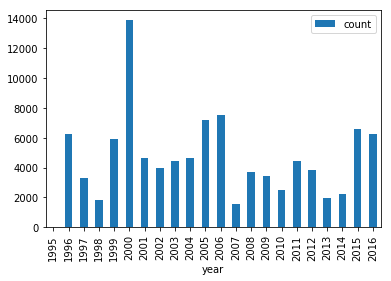

In [11]:
yearCounts.plot(kind='bar')
plt.show()

Divide rating data into train and test data.

In [12]:
df['type'] = 'train'
df['type'] = df['type'].apply(lambda x: ('train', 'test')[random.random() <= 0.1])
train = df[df['type'] == 'train']
test = df[df['type'] == 'test']

Compute average rating of all users and assign it to the all predicted ratings.

In [13]:
avgRating = train['rating'].mean()
avgPred = test.loc[:,['userId', 'movieId', 'rating']]
avgPred.loc[:,'pred'] = avgRating

Compute MAE and RMSE for the average rating prediction result.

In [14]:
avgPredErrors = avgPred['pred'] - avgPred['rating']
mae1 = avgPredErrors.abs().mean()
rmse1 = math.sqrt(avgPredErrors.abs().pow(2).mean())
print(" MAE1:", mae1)
print("RMSE1:", rmse1)

 MAE1: 0.857096923273
RMSE1: 1.0650841505180424


Compute average rating of each user and assign them to the predicted ratings of each user.

In [15]:
userAvgRatings = pd.DataFrame(data=train.groupby('userId')['rating'].mean())
userAvgRatings.columns = ['pred']
userAvgRatings['userId'] = userAvgRatings.index
userAvgPred = test.loc[:,['userId', 'movieId', 'rating']]
userAvgPred = pd.merge(userAvgPred, userAvgRatings, how='left', on=['userId'])
userAvgPred['pred'] = userAvgPred['pred'].apply(lambda x: (x, avgRating)[math.isnan(x)])

Compute MAE and RMSE for the user average rating prediction result.

In [16]:
userAvgPredErrors = userAvgPred['pred'] - userAvgPred['rating']
mae2 = userAvgPredErrors.abs().mean()
rmse2 = math.sqrt(userAvgPredErrors.abs().pow(2).mean())
print(" MAE2:", mae2)
print("RMSE2:", rmse2)

 MAE2: 0.75301183649
RMSE2: 0.9654919002570055


Compute average rating of each item and assign them to the predicted ratings of each user on the item.

In [17]:
itemAvgRatings = pd.DataFrame(data=train.groupby('movieId')['rating'].mean())
itemAvgRatings.columns = ['pred']
itemAvgRatings['movieId'] = itemAvgRatings.index
itemAvgPred = test.loc[:,['userId', 'movieId', 'rating']]
itemAvgPred = pd.merge(itemAvgPred, itemAvgRatings, how='left', on=['movieId'])
itemAvgPred['pred'] = itemAvgPred['pred'].apply(lambda x: (x, avgRating)[math.isnan(x)])

Compute MAE and RMSE for the user average rating prediction result.

In [18]:
itemAvgRatings = itemAvgPred['pred'] - itemAvgPred['rating']
mae3 = itemAvgRatings.abs().mean()
rmse3 = math.sqrt(itemAvgRatings.abs().pow(2).mean())
print(" MAE3:", mae3)
print("RMSE3:", rmse3)

 MAE3: 0.77874544222
RMSE3: 1.000398683936573


Read movie data and see the poster of movies.

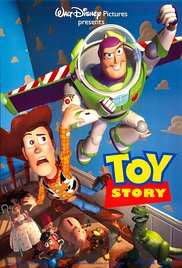

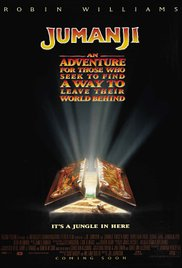

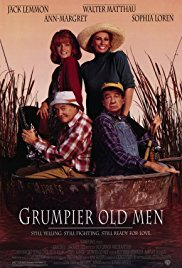

In [19]:
from IPython.display import Image, display
dfMovie = pd.read_csv('movies_w_imgurl.csv')
imgs = dfMovie.loc[:, 'imgurl']
display(Image(imgs[0]))
display(Image(imgs[1]))
display(Image(imgs[2]))